In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [2]:
pd.options.display.max_columns=1000
sns.set_theme()

In [3]:
df = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone2/data from notebooks/df.csv')

In [4]:
df.head()

,set_num,set_name,year,theme_id,num_parts,set_num_len,set_name_len,theme_name,id,part_num,color_id,quantity,color_name,part_name,is_trans,theme_name_len,part_num_len,color_name_len,part_name_len,is_ninjago
0,001-1,Gears,1965,1,43,5,5,Technic,24696,132a,7,4,Light Gray,Tyre Smooth Old Style - Small,0,7,4,10,29,0
1,001-1,Gears,1965,1,43,5,5,Technic,24696,3020,15,4,White,Plate 2 x 4,0,7,4,5,11,0
2,001-1,Gears,1965,1,43,5,5,Technic,24696,3062c,15,1,White,"Brick Round 1 x 1 Solid Stud, No Bottom Groove",0,7,5,5,46,0
3,001-1,Gears,1965,1,43,5,5,Technic,24696,3404bc01,15,4,White,"Turntable 4 x 4 - Old Type Complete, Perfectly...",0,7,8,5,52,0
4,001-1,Gears,1965,1,43,5,5,Technic,24696,36,7,4,Light Gray,Tyre Smooth Old Style - Large,0,7,2,10,29,0


In [5]:
df.shape

(919288, 20)

In [6]:
df.columns

Index(['set_num', 'set_name', 'year', 'theme_id', 'num_parts', 'set_num_len',
       'set_name_len', 'theme_name', 'id', 'part_num', 'color_id', 'quantity',
       'color_name', 'part_name', 'is_trans', 'theme_name_len', 'part_num_len',
       'color_name_len', 'part_name_len', 'is_ninjago'],
      dtype='object')

In [7]:
target_names = 'set_num set_name theme_id theme_name id part_num color_name part_name theme_name_len is_ninjago'.split()
target_names

['set_num',
 'set_name',
 'theme_id',
 'theme_name',
 'id',
 'part_num',
 'color_name',
 'part_name',
 'theme_name_len',
 'is_ninjago']

In [8]:
fn = list()

for i, name in enumerate(df.columns):
    if i > 100:
        break
    if name in target_names:
        continue
    fn.append(name)

In [9]:
X = df[fn]
y = df['is_ninjago']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state=1)

In [11]:
hyper_table_C_test = list()
fn = list()

for i, name in enumerate(X.columns):
    if i > 100:
        break
    if name in target_names:
        continue
    fn.append(name)
    
for c in tqdm(np.arange(-5, 5), total=len(df[fn].columns)):
    model = LogisticRegression(C=10.0**c, random_state=1, class_weight='balanced')
    model.fit(X_train[fn], y_train)
    s_train = model.score(X_train[fn], y_train)
    s_test = model.score(X_test[fn], y_test)
    y_pred = model.predict(X_test[fn])

    conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    hyper_table_C_test.append(dict(C=model.C,
                                train_score=s_train, 
                                test_score=s_test,
                                precision=precision,
                                recall=recall,
                                accuracy=accuracy,
                                f1_score=f1,
                                model=model, 
                                num_features=df[fn].shape[1], 
                                num_rows_train=X_train.shape[0],
                                num_rows_test=X_test.shape[0],
                                last_feature=fn[-1]))

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]C:\Users\marki\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 10%|████████▎                                                                          | 1/10 [00:08<01:15,  8.36s/it]C:\Users\marki\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data 

In [12]:
htC = pd.DataFrame(hyper_table_C_test).sort_values('test_score', ascending=False)
htC

,C,train_score,test_score,precision,recall,accuracy,f1_score,model,num_features,num_rows_train,num_rows_test,last_feature
8,1000.00000,0.632857,0.631563,0.060466,0.565324,0.631563,0.109247,"LogisticRegression(C=1000.0, class_weight='bal...",10,827359,91929,part_name_len
4,0.10000,0.625583,0.625570,0.062071,0.593087,0.625570,0.112380,"LogisticRegression(C=0.1, class_weight='balanc...",10,827359,91929,part_name_len
7,100.00000,0.625690,0.624787,0.061320,0.586282,0.624787,0.111028,"LogisticRegression(C=100.0, class_weight='bala...",10,827359,91929,part_name_len
0,0.00001,0.622971,0.621871,0.060135,0.578389,0.621871,0.108944,"LogisticRegression(C=1e-05, class_weight='bala...",10,827359,91929,part_name_len
5,1.00000,0.618144,0.617390,0.061405,0.600163,0.617390,0.111411,"LogisticRegression(class_weight='balanced', ra...",10,827359,91929,part_name_len
2,0.00100,0.617408,0.616595,0.059419,0.579477,0.616595,0.107787,"LogisticRegression(C=0.001, class_weight='bala...",10,827359,91929,part_name_len
6,10.00000,0.617535,0.616084,0.058825,0.573762,0.616084,0.106710,"LogisticRegression(C=10.0, class_weight='balan...",10,827359,91929,part_name_len
1,0.00010,0.612357,0.611483,0.059378,0.587643,0.611483,0.107858,"LogisticRegression(C=0.0001, class_weight='bal...",10,827359,91929,part_name_len
9,10000.00000,0.611032,0.609797,0.059126,0.587643,0.609797,0.107442,"LogisticRegression(C=10000.0, class_weight='ba...",10,827359,91929,part_name_len
3,0.01000,0.609628,0.608263,0.059788,0.597714,0.608263,0.108702,"LogisticRegression(C=0.01, class_weight='balan...",10,827359,91929,part_name_len


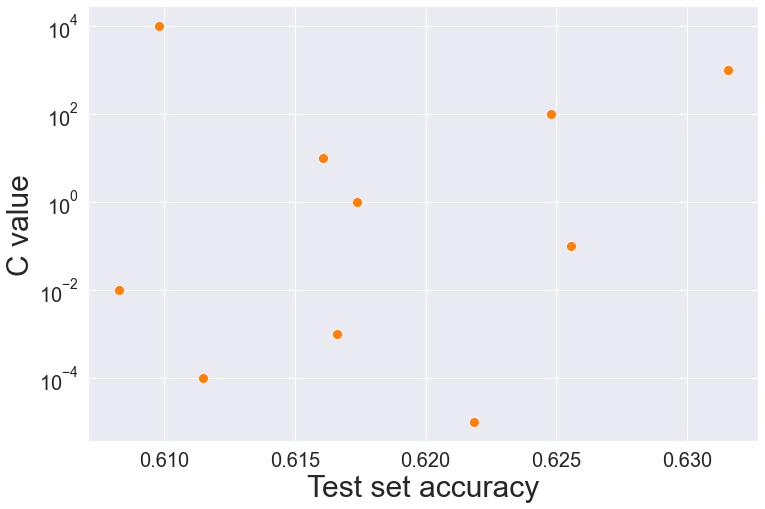

In [13]:
fig, ax = plt.subplots(figsize=(12,8))
sns.scatterplot(data=htC, x='test_score', y='C', color='tab:orange', s=100)
plt.yscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.set_xlabel('Test set accuracy', fontsize=30)
ax.set_ylabel('C value', fontsize=30)
plt.show()

In [14]:
hyper_table = list()
fn = list()
model = LogisticRegression(C=1000, random_state=1, class_weight='balanced')

for i, name in tqdm(enumerate(X.columns), total=len(X.columns)):
    if i > 100:
        break
    if name in target_names:
        continue
    fn.append(name)
    model.fit(X_train[fn], y_train)
    s_train = model.score(X_train[fn], y_train)
    s_test = model.score(X_test[fn], y_test)
    y_pred = model.predict(X_test[fn])

    conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    hyper_table.append(dict(sample='balanced',
                            desc=str(fn), 
                            train_score=s_train, 
                            test_score=s_test,
                            model=model, 
                            precision=precision,
                            recall=recall,
                            accuracy=accuracy,
                            f1_score=f1,
                            num_features=df[fn].shape[1], 
                            num_rows_train=X_train.shape[0],
                            num_rows_test=X_test.shape[0], 
                            last_feature=fn[-1]))

 70%|██████████████████████████████████████████████████████████                         | 7/10 [00:21<00:12,  4.17s/it]C:\Users\marki\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [00:29<00:10,  5.34s/it]C:\Users\marki\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data 

In [15]:
model_rf = RandomForestClassifier(n_estimators=100, random_state = 1,n_jobs=-1)
fn = list()

for i, name in tqdm(enumerate(X.columns), total=len(X.columns)):
    if i > 100:
        break
    if name in target_names:
        continue
    fn.append(name)
    model_rf.fit(X_train[fn], y_train)
    s_train = model_rf.score(X_train[fn], y_train)
    s_test = model_rf.score(X_test[fn], y_test)
    y_pred = model_rf.predict(X_test[fn])

    conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    hyper_table.append(dict(sample='balanced',
                            desc=str(fn), 
                            train_score=s_train, 
                            test_score=s_test,
                            precision=precision,
                            recall=recall,
                            accuracy=accuracy,
                            f1_score=f1,
                            model=model_rf, 
                            num_features=df[fn].shape[1], 
                            num_rows_train=X_train.shape[0],
                            num_rows_test=X_test.shape[0], 
                            last_feature=fn[-1]))

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]C:\Users\marki\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [05:01<00:00, 30.18s/it]


In [16]:
ht0 = pd.DataFrame(hyper_table).sort_values('test_score', ascending=False)
ht0

,sample,desc,train_score,test_score,model,precision,recall,accuracy,f1_score,num_features,num_rows_train,num_rows_test,last_feature
13,balanced,"['year', 'num_parts', 'set_num_len', 'set_name...",0.999401,0.999347,"(DecisionTreeClassifier(max_features='auto', r...",0.992639,0.991018,0.999347,0.991828,4,827359,91929,set_name_len
14,balanced,"['year', 'num_parts', 'set_num_len', 'set_name...",0.999792,0.999162,"(DecisionTreeClassifier(max_features='auto', r...",0.993687,0.985302,0.999162,0.989477,5,827359,91929,color_id
15,balanced,"['year', 'num_parts', 'set_num_len', 'set_name...",0.999861,0.998325,"(DecisionTreeClassifier(max_features='auto', r...",0.992997,0.964888,0.998325,0.978741,6,827359,91929,quantity
16,balanced,"['year', 'num_parts', 'set_num_len', 'set_name...",0.999861,0.997520,"(DecisionTreeClassifier(max_features='auto', r...",0.993414,0.944203,0.997520,0.968183,7,827359,91929,is_trans
18,balanced,"['year', 'num_parts', 'set_num_len', 'set_name...",0.999903,0.996845,"(DecisionTreeClassifier(max_features='auto', r...",0.990435,0.930049,0.996845,0.959293,9,827359,91929,color_name_len
17,balanced,"['year', 'num_parts', 'set_num_len', 'set_name...",0.999903,0.995203,"(DecisionTreeClassifier(max_features='auto', r...",0.987338,0.891399,0.995203,0.936919,8,827359,91929,part_num_len
19,balanced,"['year', 'num_parts', 'set_num_len', 'set_name...",0.999984,0.994757,"(DecisionTreeClassifier(max_features='auto', r...",0.994424,0.873707,0.994757,0.930165,10,827359,91929,part_name_len
12,balanced,"['year', 'num_parts', 'set_num_len']",0.994464,0.994082,"(DecisionTreeClassifier(max_features='auto', r...",0.951790,0.897387,0.994082,0.923788,3,827359,91929,set_num_len
11,balanced,"['year', 'num_parts']",0.993173,0.992951,"(DecisionTreeClassifier(max_features='auto', r...",0.945262,0.874251,0.992951,0.908371,2,827359,91929,num_parts
10,balanced,['year'],0.961572,0.960034,"(DecisionTreeClassifier(max_features='auto', r...",0.000000,0.000000,0.960034,0.000000,1,827359,91929,year


10


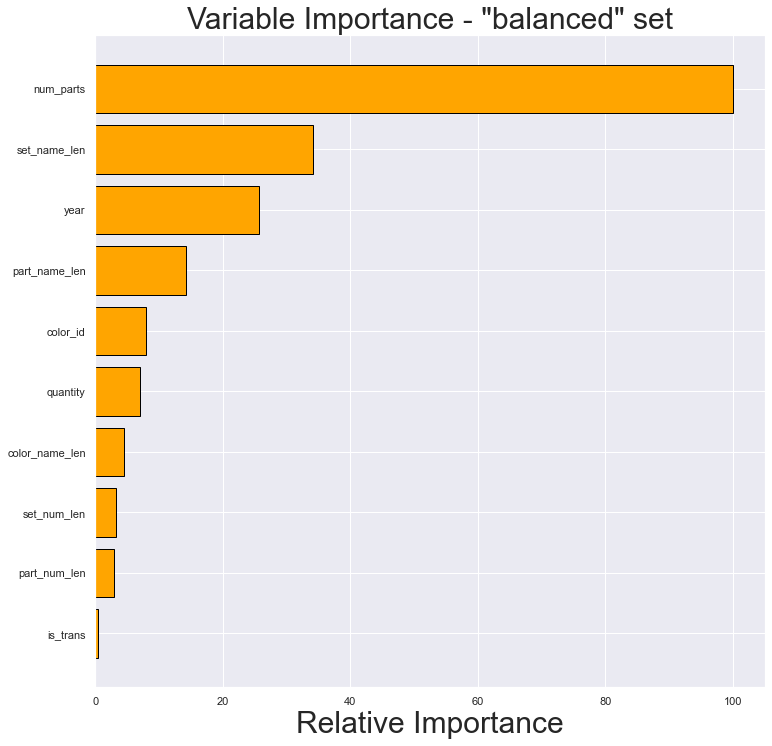

In [17]:
feature_importance = model_rf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(12,12))
plt.barh(pos, feature_importance[sorted_idx], color='orange', edgecolor='black', align='center')
plt.yticks(pos, df[fn].columns[sorted_idx])
plt.xlabel('Relative Importance', fontsize=30)
plt.title('Variable Importance - "balanced" set', fontsize=30)
plt.grid(True)
plt.show()

In [18]:
hyper_table = list()
model_rf = RandomForestClassifier(n_estimators=1, random_state = 1,n_jobs=-1, class_weight='balanced')

In [19]:
target_names = 'is_trans set_num set_name theme_id theme_name id part_num color_name part_name theme_name_len is_ninjago'.split()

fn = list()

for i, name in enumerate(df.columns):
    if i > 100:
        break
    if name in target_names:
        continue
    fn.append(name)

X = df[fn]
y = df['is_ninjago']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state=1)

model_rf.fit(X_train[fn], y_train)
s_train = model_rf.score(X_train[fn], y_train)
s_test = model_rf.score(X_test[fn], y_test)
y_pred = model_rf.predict(X_test[fn])

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1_0 = f1_score(y_test, y_pred)

hyper_table.append(dict(sample='balanced', 
                    missing_feature=target_names[0], 
                    train_score=s_train, 
                    test_score=s_test,
                    precision=precision,
                    recall=recall,
                    accuracy=accuracy,
                    f1_score=f1_0,
                    model=model_rf, 
                    num_features=df[fn].shape[1], 
                    num_rows_train=X_train.shape[0],
                    num_rows_test=X_test.shape[0],
                    last_feature=fn[-1]))

In [20]:
target_names = 'part_num_len set_num set_name theme_id theme_name id part_num color_name part_name theme_name_len is_ninjago'.split()

fn = list()

for i, name in enumerate(df.columns):
    if i > 100:
        break
    if name in target_names:
        continue
    fn.append(name)

X = df[fn]
y = df['is_ninjago']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state=1)

model_rf.fit(X_train[fn], y_train)
s_train = model_rf.score(X_train[fn], y_train)
s_test = model_rf.score(X_test[fn], y_test)
y_pred = model_rf.predict(X_test[fn])

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1_1 = f1_score(y_test, y_pred)

hyper_table.append(dict(sample='balanced', 
                    missing_feature=target_names[0], 
                    train_score=s_train, 
                    test_score=s_test,
                    precision=precision,
                    recall=recall,
                    accuracy=accuracy,
                    f1_score=f1_1,
                    model=model_rf, 
                    num_features=df[fn].shape[1], 
                    num_rows_train=X_train.shape[0],
                    num_rows_test=X_test.shape[0],
                    last_feature=fn[-1]))

In [21]:
target_names = 'set_num_len set_num set_name theme_id theme_name id part_num color_name part_name theme_name_len is_ninjago'.split()

fn = list()

for i, name in enumerate(df.columns):
    if i > 100:
        break
    if name in target_names:
        continue
    fn.append(name)

X = df[fn]
y = df['is_ninjago']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state=1)

model_rf.fit(X_train[fn], y_train)
s_train = model_rf.score(X_train[fn], y_train)
s_test = model_rf.score(X_test[fn], y_test)
y_pred = model_rf.predict(X_test[fn])

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1_2 = f1_score(y_test, y_pred)

hyper_table.append(dict(sample='balanced', 
                    missing_feature=target_names[0], 
                    train_score=s_train, 
                    test_score=s_test,
                    precision=precision,
                    recall=recall,
                    accuracy=accuracy,
                    f1_score=f1_2,
                    model=model_rf, 
                    num_features=df[fn].shape[1], 
                    num_rows_train=X_train.shape[0],
                    num_rows_test=X_test.shape[0], 
                    last_feature=fn[-1]))

In [22]:
target_names = 'color_name_len set_num set_name theme_id theme_name id part_num color_name part_name theme_name_len is_ninjago'.split()

fn = list()

for i, name in enumerate(df.columns):
    if i > 100:
        break
    if name in target_names:
        continue
    fn.append(name)

X = df[fn]
y = df['is_ninjago']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state=1)

model_rf.fit(X_train[fn], y_train)
s_train = model_rf.score(X_train[fn], y_train)
s_test = model_rf.score(X_test[fn], y_test)
y_pred = model_rf.predict(X_test[fn])

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1_3 = f1_score(y_test, y_pred)

hyper_table.append(dict(sample='balanced', 
                    missing_feature=target_names[0], 
                    train_score=s_train, 
                    test_score=s_test,
                    precision=precision,
                    recall=recall,
                    accuracy=accuracy,
                    f1_score=f1_3,
                    model=model_rf, 
                    num_features=df[fn].shape[1], 
                    num_rows_train=X_train.shape[0],
                    num_rows_test=X_test.shape[0], 
                    last_feature=fn[-1]))

In [23]:
target_names = 'quantity set_num set_name theme_id theme_name id part_num color_name part_name theme_name_len is_ninjago'.split()

fn = list()

for i, name in enumerate(df.columns):
    if i > 100:
        break
    if name in target_names:
        continue
    fn.append(name)

X = df[fn]
y = df['is_ninjago']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state=1)

model_rf.fit(X_train[fn], y_train)
s_train = model_rf.score(X_train[fn], y_train)
s_test = model_rf.score(X_test[fn], y_test)
y_pred = model_rf.predict(X_test[fn])

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1_4 = f1_score(y_test, y_pred)

hyper_table.append(dict(sample='balanced', 
                    missing_feature=target_names[0], 
                    train_score=s_train, 
                    test_score=s_test,
                    precision=precision,
                    recall=recall,
                    accuracy=accuracy,
                    f1_score=f1_4,
                    model=model_rf, 
                    num_features=df[fn].shape[1], 
                    num_rows_train=X_train.shape[0],
                    num_rows_test=X_test.shape[0],
                    last_feature=fn[-1]))

In [24]:
target_names = 'color_id set_num set_name theme_id theme_name id part_num color_name part_name theme_name_len is_ninjago'.split()

fn = list()

for i, name in enumerate(df.columns):
    if i > 100:
        break
    if name in target_names:
        continue
    fn.append(name)

X = df[fn]
y = df['is_ninjago']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state=1)

model_rf.fit(X_train[fn], y_train)
s_train = model_rf.score(X_train[fn], y_train)
s_test = model_rf.score(X_test[fn], y_test)
y_pred = model_rf.predict(X_test[fn])

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1_5 = f1_score(y_test, y_pred)

hyper_table.append(dict(sample='balanced', 
                    missing_feature=target_names[0], 
                    train_score=s_train, 
                    test_score=s_test,
                    precision=precision,
                    recall=recall,
                    accuracy=accuracy,
                    f1_score=f1_5,
                    model=model_rf, 
                    num_features=df[fn].shape[1], 
                    num_rows_train=X_train.shape[0],
                    num_rows_test=X_test.shape[0], 
                    last_feature=fn[-1]))

In [25]:
target_names = 'part_name_len set_num set_name theme_id theme_name id part_num color_name part_name theme_name_len is_ninjago'.split()

fn = list()

for i, name in enumerate(df.columns):
    if i > 100:
        break
    if name in target_names:
        continue
    fn.append(name)

X = df[fn]
y = df['is_ninjago']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state=1)

model_rf.fit(X_train[fn], y_train)
s_train = model_rf.score(X_train[fn], y_train)
s_test = model_rf.score(X_test[fn], y_test)
y_pred = model_rf.predict(X_test[fn])

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1_6 = f1_score(y_test, y_pred)

hyper_table.append(dict(sample='balanced', 
                    missing_feature=target_names[0], 
                    train_score=s_train, 
                    test_score=s_test,
                    precision=precision,
                    recall=recall,
                    accuracy=accuracy,
                    f1_score=f1_6,
                    model=model_rf, 
                    num_features=df[fn].shape[1], 
                    num_rows_train=X_train.shape[0],
                    num_rows_test=X_test.shape[0], 
                    last_feature=fn[-1]))

In [26]:
target_names = 'year set_num set_name theme_id theme_name id part_num color_name part_name theme_name_len is_ninjago'.split()

fn = list()

for i, name in enumerate(df.columns):
    if i > 100:
        break
    if name in target_names:
        continue
    fn.append(name)

X = df[fn]
y = df['is_ninjago']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state=1)

model_rf.fit(X_train[fn], y_train)
s_train = model_rf.score(X_train[fn], y_train)
s_test = model_rf.score(X_test[fn], y_test)
y_pred = model_rf.predict(X_test[fn])

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1_7 = f1_score(y_test, y_pred)

hyper_table.append(dict(sample='balanced', 
                    missing_feature=target_names[0], 
                    train_score=s_train, 
                    test_score=s_test,
                    precision=precision,
                    recall=recall,
                    accuracy=accuracy,
                    f1_score=f1_7,
                    model=model_rf, 
                    num_features=df[fn].shape[1], 
                    num_rows_train=X_train.shape[0],
                    num_rows_test=X_test.shape[0], 
                    last_feature=fn[-1]))

In [27]:
target_names = 'set_name_len set_num set_name theme_id theme_name id part_num color_name part_name theme_name_len is_ninjago'.split()

fn = list()

for i, name in enumerate(df.columns):
    if i > 100:
        break
    if name in target_names:
        continue
    fn.append(name)

X = df[fn]
y = df['is_ninjago']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state=1)

model_rf.fit(X_train[fn], y_train)
s_train = model_rf.score(X_train[fn], y_train)
s_test = model_rf.score(X_test[fn], y_test)
y_pred = model_rf.predict(X_test[fn])

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1_8 = f1_score(y_test, y_pred)

hyper_table.append(dict(sample='balanced', 
                    missing_feature=target_names[0], 
                    train_score=s_train, 
                    test_score=s_test,
                    precision=precision,
                    recall=recall,
                    accuracy=accuracy,
                    f1_score=f1_8,
                    model=model_rf, 
                    num_features=df[fn].shape[1], 
                    num_rows_train=X_train.shape[0],
                    num_rows_test=X_test.shape[0], 
                    last_feature=fn[-1]))

In [28]:
target_names = 'num_parts set_num set_name theme_id theme_name id part_num color_name part_name theme_name_len is_ninjago'.split()

fn = list()

for i, name in enumerate(df.columns):
    if i > 100:
        break
    if name in target_names:
        continue
    fn.append(name)

target_names[0]

X = df[fn]
y = df['is_ninjago']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state=1)

model_rf.fit(X_train[fn], y_train)
s_train = model_rf.score(X_train[fn], y_train)
s_test = model_rf.score(X_test[fn], y_test)
y_pred = model_rf.predict(X_test[fn])

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1_9 = f1_score(y_test, y_pred)

hyper_table.append(dict(sample='balanced', 
                    missing_feature=target_names[0], 
                    train_score=s_train, 
                    test_score=s_test,
                    precision=precision,
                    recall=recall,
                    accuracy=accuracy,
                    f1_score=f1_9,
                    model=model_rf, 
                    num_features=df[fn].shape[1], 
                    num_rows_train=X_train.shape[0],
                    num_rows_test=X_test.shape[0], 
                    last_feature=fn[-1]))

In [29]:
ht = pd.DataFrame(hyper_table).sort_values('test_score', ascending=False)
ht

,sample,missing_feature,train_score,test_score,precision,recall,accuracy,f1_score,model,num_features,num_rows_train,num_rows_test,last_feature
6,balanced,part_name_len,0.997910,0.994137,0.940185,0.911268,0.994137,0.925501,"(DecisionTreeClassifier(max_features='auto', r...",9,827359,91929,color_name_len
5,balanced,color_id,0.996761,0.991863,0.914448,0.878606,0.991863,0.896169,"(DecisionTreeClassifier(max_features='auto', r...",9,827359,91929,part_name_len
1,balanced,part_num_len,0.996822,0.990960,0.902349,0.867719,0.990960,0.884695,"(DecisionTreeClassifier(max_features='auto', r...",9,827359,91929,part_name_len
4,balanced,quantity,0.996440,0.990286,0.889169,0.864725,0.990286,0.876777,"(DecisionTreeClassifier(max_features='auto', r...",9,827359,91929,part_name_len
2,balanced,set_num_len,0.996167,0.988970,0.882404,0.835329,0.988970,0.858221,"(DecisionTreeClassifier(max_features='auto', r...",9,827359,91929,part_name_len
0,balanced,is_trans,0.995775,0.988350,0.871327,0.831247,0.988350,0.850815,"(DecisionTreeClassifier(max_features='auto', r...",9,827359,91929,part_name_len
3,balanced,color_name_len,0.995760,0.987936,0.866115,0.825803,0.987936,0.845479,"(DecisionTreeClassifier(max_features='auto', r...",9,827359,91929,part_name_len
8,balanced,set_name_len,0.990797,0.975253,0.703521,0.658138,0.975253,0.680073,"(DecisionTreeClassifier(max_features='auto', r...",9,827359,91929,part_name_len
7,balanced,year,0.989625,0.971902,0.660677,0.610506,0.971902,0.634602,"(DecisionTreeClassifier(max_features='auto', r...",9,827359,91929,part_name_len
9,balanced,num_parts,0.968161,0.943554,0.341693,0.445019,0.943554,0.386571,"(DecisionTreeClassifier(max_features='auto', r...",9,827359,91929,part_name_len


In [30]:
ht['diff'] = ht['test_score'].diff()

In [31]:
ht.sort_values('diff')

,sample,missing_feature,train_score,test_score,precision,recall,accuracy,f1_score,model,num_features,num_rows_train,num_rows_test,last_feature,diff
9,balanced,num_parts,0.968161,0.943554,0.341693,0.445019,0.943554,0.386571,"(DecisionTreeClassifier(max_features='auto', r...",9,827359,91929,part_name_len,-0.028348
8,balanced,set_name_len,0.990797,0.975253,0.703521,0.658138,0.975253,0.680073,"(DecisionTreeClassifier(max_features='auto', r...",9,827359,91929,part_name_len,-0.012684
7,balanced,year,0.989625,0.971902,0.660677,0.610506,0.971902,0.634602,"(DecisionTreeClassifier(max_features='auto', r...",9,827359,91929,part_name_len,-0.003350
5,balanced,color_id,0.996761,0.991863,0.914448,0.878606,0.991863,0.896169,"(DecisionTreeClassifier(max_features='auto', r...",9,827359,91929,part_name_len,-0.002273
2,balanced,set_num_len,0.996167,0.988970,0.882404,0.835329,0.988970,0.858221,"(DecisionTreeClassifier(max_features='auto', r...",9,827359,91929,part_name_len,-0.001316
1,balanced,part_num_len,0.996822,0.990960,0.902349,0.867719,0.990960,0.884695,"(DecisionTreeClassifier(max_features='auto', r...",9,827359,91929,part_name_len,-0.000903
4,balanced,quantity,0.996440,0.990286,0.889169,0.864725,0.990286,0.876777,"(DecisionTreeClassifier(max_features='auto', r...",9,827359,91929,part_name_len,-0.000674
0,balanced,is_trans,0.995775,0.988350,0.871327,0.831247,0.988350,0.850815,"(DecisionTreeClassifier(max_features='auto', r...",9,827359,91929,part_name_len,-0.000620
3,balanced,color_name_len,0.995760,0.987936,0.866115,0.825803,0.987936,0.845479,"(DecisionTreeClassifier(max_features='auto', r...",9,827359,91929,part_name_len,-0.000413
6,balanced,part_name_len,0.997910,0.994137,0.940185,0.911268,0.994137,0.925501,"(DecisionTreeClassifier(max_features='auto', r...",9,827359,91929,color_name_len,NaN


In [32]:
ht0.to_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone2/data from notebooks/ht0.csv', index=False)

In [33]:
hyper_table = list()

In [34]:
target_names = 'year num_parts set_name_len'.split()

fn = list()

for i, name in enumerate(target_names):
    fn.append(name)
    
fn

['year', 'num_parts', 'set_name_len']

In [35]:
X = df[fn]
y = df['is_ninjago']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state=1)

model_rf = RandomForestClassifier(n_estimators=1, random_state = 1, n_jobs=-1, class_weight='balanced')

model_rf.fit(X_train[fn], y_train)
s_train = model_rf.score(X_train[fn], y_train)
s_test = model_rf.score(X_test[fn], y_test)
y_pred = model_rf.predict(X_test[fn])

In [36]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

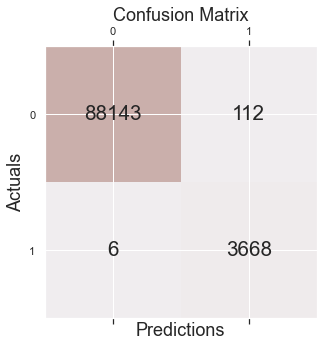

In [37]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [38]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [39]:
hyper_table.append(dict(sample='balanced', 
                    train_score=s_train, 
                    test_score=s_test,
                    precision=precision,
                    recall=recall,
                    accuracy=accuracy,
                    f1_score=f1,
                    model=model_rf, 
                    num_features=df[fn].shape[1], 
                    num_rows_train=X_train.shape[0],
                    num_rows_test=X_test.shape[0])) 

In [40]:
ht_fr = pd.DataFrame(hyper_table)
ht_fr

,sample,train_score,test_score,precision,recall,accuracy,f1_score,model,num_features,num_rows_train,num_rows_test
0,balanced,0.998901,0.998716,0.97037,0.998367,0.998716,0.98417,"(DecisionTreeClassifier(max_features='auto', r...",3,827359,91929


In [41]:
ht_fr.to_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone2/data from notebooks/ht_fr_bal.csv', index=False)